# MLP for Regression

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

## Import Data

Using the energy efficiency dataset from UCI.

In [2]:
dataset_path = keras.utils.get_file("ENB2012_data.xlsx", "http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")

In [3]:
import pandas as pd

column_names = ['Relative Compactness', 'Surface Area', 'Wall Area',
               'Roof Area', 'Overall Height', 'Orientation',
               'Glazing Area', 'Glazing Area Distribution',
               'Heating Load', 'Cooling Load']
raw_dataset = pd.read_excel(dataset_path, names = column_names,
                           na_values = '?', comment = '\t',
                           sep = ' ', skipinitialspace = True)
dataset = raw_dataset.copy()

In [4]:
dataset.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
dataset.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Preprocess data

In [6]:
# Check for NA's
dataset.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [7]:
# Split train/test data
total_train = dataset.sample(frac = 0.8, random_state = 0)
total_valid = dataset.drop(total_train.index)

In [8]:
# Predict Heating Load
y_train = total_train.pop('Heating Load')
y_valid = total_valid.pop('Heating Load')
X_train = total_train
X_valid = total_valid

In [9]:
# Normalize
X_train = tf.keras.utils.normalize(X_train, axis = -1, order = 2)
X_valid = tf.keras.utils.normalize(X_valid, axis = -1, order = 2)

## Build model

In [10]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = 'relu', input_shape = [9]),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss = 'mse',
                 optimizer = optimizer,
                 metrics = ['mae', 'mse'])
    
    return model

In [11]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [13]:
EPOCHS = 500

history = model.fit(
    X_train, y_train,
    epochs = EPOCHS,
    verbose = 1,
    validation_data = (X_valid, y_valid),
    callbacks = [early_stop, tfdocs.modeling.EpochDots()]
)

Epoch 1/500
18/20 [==========================>...] - ETA: 0s - loss: 596.1853 - mae: 22.2443 - mse: 596.1853
Epoch: 0, loss:589.2918,  mae:22.0828,  mse:589.2918,  val_loss:494.5882,  val_mae:19.8343,  val_mse:494.5882,  
20/20 [==============================] - 1s 53ms/step - loss: 589.2918 - mae: 22.0828 - mse: 589.2918 - val_loss: 494.5882 - val_mae: 19.8343 - val_mse: 494.5882
Epoch 2/500
20/20 [==============================] - 0s 22ms/step - loss: 545.6738 - mae: 21.0761 - mse: 545.6738 - val_loss: 450.5298 - val_mae: 18.6924 - val_mse: 450.5298
Epoch 3/500
20/20 [==============================] - 0s 20ms/step - loss: 490.7828 - mae: 19.7414 - mse: 490.7828 - val_loss: 393.8297 - val_mae: 17.1116 - val_mse: 393.8297
Epoch 4/500
20/20 [==============================] - 0s 21ms/step - loss: 421.8042 - mae: 17.9301 - mse: 421.8042 - val_loss: 324.9058 - val_mae: 14.9693 - val_mse: 324.9058
Epoch 5/500
20/20 [==============================] - 0s 20ms/step - loss: 343.5674 - mae: 15.5

Epoch 48/500
20/20 [==============================] - 0s 18ms/step - loss: 44.3764 - mae: 5.7578 - mse: 44.3764 - val_loss: 45.3111 - val_mae: 5.9008 - val_mse: 45.3111
Epoch 49/500
20/20 [==============================] - 0s 9ms/step - loss: 41.7838 - mae: 5.5531 - mse: 41.7838 - val_loss: 42.1134 - val_mae: 5.5918 - val_mse: 42.1134
Epoch 50/500
20/20 [==============================] - 0s 18ms/step - loss: 39.3329 - mae: 5.3453 - mse: 39.3329 - val_loss: 39.1174 - val_mae: 5.2149 - val_mse: 39.1174
Epoch 51/500
20/20 [==============================] - 0s 14ms/step - loss: 36.7159 - mae: 5.0678 - mse: 36.7159 - val_loss: 38.7128 - val_mae: 5.4166 - val_mse: 38.7128
Epoch 52/500
20/20 [==============================] - 0s 12ms/step - loss: 33.9671 - mae: 4.8616 - mse: 33.9671 - val_loss: 34.1228 - val_mae: 4.9498 - val_mse: 34.1228
Epoch 53/500
20/20 [==============================] - 0s 9ms/step - loss: 31.2247 - mae: 4.5990 - mse: 31.2247 - val_loss: 31.4445 - val_mae: 4.7277 - val_m

20/20 [==============================] - 0s 11ms/step - loss: 15.8253 - mae: 2.8602 - mse: 15.8253 - val_loss: 14.2741 - val_mae: 2.7986 - val_mse: 14.2741
Epoch 97/500
20/20 [==============================] - 0s 8ms/step - loss: 15.8252 - mae: 2.8413 - mse: 15.8252 - val_loss: 13.8574 - val_mae: 2.7210 - val_mse: 13.8574
Epoch 98/500
20/20 [==============================] - 0s 13ms/step - loss: 15.6092 - mae: 2.8036 - mse: 15.6092 - val_loss: 13.9502 - val_mae: 2.7669 - val_mse: 13.9502
Epoch 99/500
20/20 [==============================] - 0s 14ms/step - loss: 15.7195 - mae: 2.8355 - mse: 15.7195 - val_loss: 14.4142 - val_mae: 2.7658 - val_mse: 14.4142
Epoch 100/500
20/20 [==============================] - 0s 12ms/step - loss: 15.6144 - mae: 2.8128 - mse: 15.6144 - val_loss: 13.6708 - val_mae: 2.7278 - val_mse: 13.6708
Epoch 101/500
18/20 [==========================>...] - ETA: 0s - loss: 15.7309 - mae: 2.8301 - mse: 15.7309
Epoch: 100, loss:15.6366,  mae:2.8278,  mse:15.6366,  val_lo

20/20 [==============================] - 0s 15ms/step - loss: 14.2447 - mae: 2.6855 - mse: 14.2447 - val_loss: 12.1821 - val_mae: 2.5517 - val_mse: 12.1821
Epoch 144/500
20/20 [==============================] - 0s 21ms/step - loss: 14.0949 - mae: 2.6800 - mse: 14.0949 - val_loss: 12.4690 - val_mae: 2.5930 - val_mse: 12.4690
Epoch 145/500
20/20 [==============================] - 0s 24ms/step - loss: 14.1190 - mae: 2.6843 - mse: 14.1190 - val_loss: 12.1451 - val_mae: 2.5540 - val_mse: 12.1451
Epoch 146/500
20/20 [==============================] - 1s 28ms/step - loss: 14.1135 - mae: 2.6892 - mse: 14.1135 - val_loss: 12.2504 - val_mae: 2.5550 - val_mse: 12.2504
Epoch 147/500
20/20 [==============================] - 1s 31ms/step - loss: 13.9769 - mae: 2.6572 - mse: 13.9769 - val_loss: 12.9967 - val_mae: 2.6279 - val_mse: 12.9967
Epoch 148/500
20/20 [==============================] - 1s 38ms/step - loss: 14.1662 - mae: 2.6835 - mse: 14.1662 - val_loss: 12.5936 - val_mae: 2.6126 - val_mse: 12

20/20 [==============================] - 0s 20ms/step - loss: 12.9004 - mae: 2.5623 - mse: 12.9004 - val_loss: 13.4468 - val_mae: 2.6891 - val_mse: 13.4468
Epoch 192/500
20/20 [==============================] - 0s 16ms/step - loss: 12.9471 - mae: 2.5732 - mse: 12.9471 - val_loss: 11.6817 - val_mae: 2.4872 - val_mse: 11.6817
Epoch 193/500
20/20 [==============================] - 0s 17ms/step - loss: 12.8478 - mae: 2.5618 - mse: 12.8478 - val_loss: 11.7822 - val_mae: 2.4926 - val_mse: 11.7822
Epoch 194/500
20/20 [==============================] - 0s 15ms/step - loss: 12.8609 - mae: 2.5673 - mse: 12.8609 - val_loss: 11.0087 - val_mae: 2.4289 - val_mse: 11.0087
Epoch 195/500
20/20 [==============================] - 0s 18ms/step - loss: 12.8665 - mae: 2.5594 - mse: 12.8665 - val_loss: 11.7526 - val_mae: 2.4917 - val_mse: 11.7526
Epoch 196/500
20/20 [==============================] - 0s 13ms/step - loss: 12.7185 - mae: 2.5657 - mse: 12.7185 - val_loss: 11.1533 - val_mae: 2.4303 - val_mse: 11

20/20 [==============================] - 0s 17ms/step - loss: 11.4125 - mae: 2.4008 - mse: 11.4125 - val_loss: 10.4826 - val_mae: 2.3337 - val_mse: 10.4826
Epoch 239/500
20/20 [==============================] - 0s 18ms/step - loss: 11.4625 - mae: 2.4246 - mse: 11.4625 - val_loss: 9.9517 - val_mae: 2.2735 - val_mse: 9.9517
Epoch 240/500
20/20 [==============================] - 0s 18ms/step - loss: 11.3277 - mae: 2.3919 - mse: 11.3277 - val_loss: 9.9612 - val_mae: 2.2925 - val_mse: 9.9612
Epoch 241/500
20/20 [==============================] - 0s 16ms/step - loss: 11.3682 - mae: 2.4052 - mse: 11.3682 - val_loss: 9.9189 - val_mae: 2.2939 - val_mse: 9.9189
Epoch 242/500
20/20 [==============================] - 0s 16ms/step - loss: 11.4524 - mae: 2.4293 - mse: 11.4524 - val_loss: 9.7458 - val_mae: 2.2680 - val_mse: 9.7458
Epoch 243/500
20/20 [==============================] - 0s 19ms/step - loss: 11.2520 - mae: 2.3833 - mse: 11.2520 - val_loss: 11.5131 - val_mae: 2.4769 - val_mse: 11.5131
Ep

Epoch 287/500
20/20 [==============================] - 0s 18ms/step - loss: 10.3226 - mae: 2.2994 - mse: 10.3226 - val_loss: 12.1954 - val_mae: 2.6599 - val_mse: 12.1954
Epoch 288/500
20/20 [==============================] - 0s 17ms/step - loss: 10.5144 - mae: 2.3115 - mse: 10.5144 - val_loss: 9.1891 - val_mae: 2.1872 - val_mse: 9.1891
Epoch 289/500
20/20 [==============================] - 0s 18ms/step - loss: 10.2642 - mae: 2.2879 - mse: 10.2642 - val_loss: 9.4063 - val_mae: 2.2042 - val_mse: 9.4063
Epoch 290/500
20/20 [==============================] - 0s 23ms/step - loss: 10.2023 - mae: 2.2997 - mse: 10.2023 - val_loss: 8.8687 - val_mae: 2.1351 - val_mse: 8.8687
Epoch 291/500
20/20 [==============================] - 0s 14ms/step - loss: 10.2295 - mae: 2.2850 - mse: 10.2295 - val_loss: 9.1492 - val_mae: 2.1737 - val_mse: 9.1492
Epoch 292/500
20/20 [==============================] - 0s 18ms/step - loss: 10.3982 - mae: 2.3265 - mse: 10.3982 - val_loss: 9.2387 - val_mae: 2.1842 - val_ms

## Evaluate the model

5/5 - 0s - loss: 9.1833 - mae: 2.1961 - mse: 9.1833


[9.183332443237305, 2.19608211517334, 9.183332443237305]

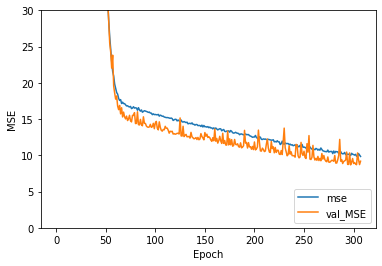

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['mse'], label = 'mse')
plt.plot(history.history['val_mse'], label = 'val_MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.ylim([0, 30])
plt.legend(loc = 'lower right')

model.evaluate(X_valid, y_valid, verbose = 2)

## Make predictions

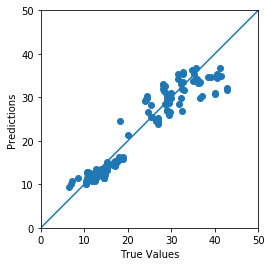

In [15]:
preds = model.predict(X_valid).flatten()

a = plt.axes(aspect = 'equal')
plt.scatter(y_valid, preds)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

View error distribution.

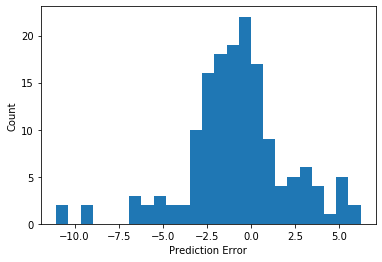

In [16]:
error = preds - y_valid
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")